# Stock Price Prediction

Create a LSTM model to predict the "Close" stock price of Apple Inc using past 60 days data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
 
plt.style.use('fivethirtyeight')

In [2]:
!pip install yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.



     -------------------------------------- 50.4/50.4 kB 854.9 kB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


# Import Data
- Get the stock quote using Yahoo Finance API
- Data from 2015 to Jan 1st, 2021

In [3]:
import yfinance as yf
import datetime

tickers_list= ['AAPL']
df = yf.download(tickers_list,threads= False,start=datetime.datetime(2015,1,1),
                                end=datetime.datetime(2021,1,1))

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603207,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910089,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912338,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247648,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179295,237458000


- Open: Starting price 
- Close: Final price
- High: Highest price that day
- Low: Highest price that day

In [4]:
df.shape

(1511, 6)

# Visual Insight
Trend of closing price per the years

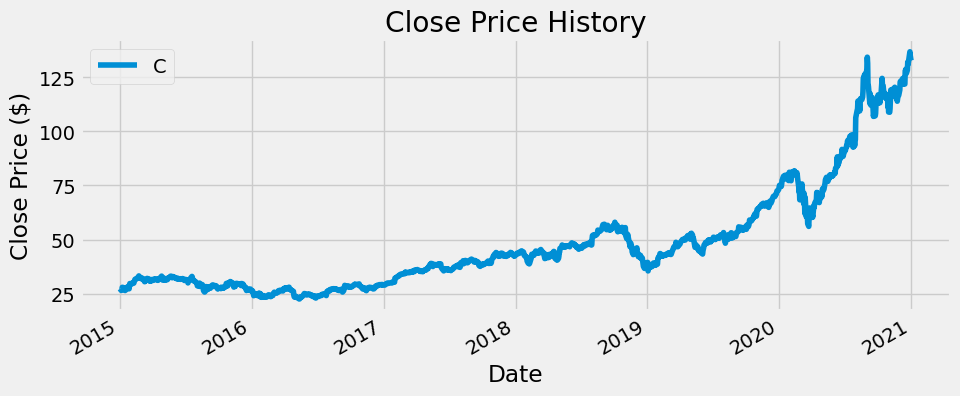

In [5]:
df['Close'].plot(figsize=(10,4), legend=True)
plt.legend('Close Price @Apple')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

Let's predict the close price. Hence, use the Close column only.

In [6]:
df = df[['Close']]
df_array = df.values

In [7]:
train_data_len = math.ceil(len(df)*0.8)
train_data_len

1209

## Scale the train data

In [8]:
sc = MinMaxScaler()
#train_scaled = sc.fit_transform(train_data)
scaled = sc.fit_transform(df)
scaled

array([[0.04160643],
       [0.03485825],
       [0.03488017],
       ...,
       [0.98404971],
       [0.97397133],
       [0.96494457]])

# Prepare Training Data with the past 60 days
- xtrain: 1st indexed array has index values from 0-59, 2nd has 1-60 and so on..
- ytrain: 1st value would be 61st value(prediction of next day) and so one

In [9]:
xtrain, ytrain = [], []
for i in range(60, len(scaled)):
    #contain 60 values from pos 1 - 59. 
    xtrain.append(scaled[i-60:i])
    #at poition 60
    ytrain.append(scaled[i])

### Last 5 values of input vs to be predicted outputs

#### First data point (xtrain[0])

In [10]:
xtrain[0][-5:],ytrain[0]

(array([[0.07964157],
        [0.07238947],
        [0.0742737 ],
        [0.07210465],
        [0.07894046]]),
 array([0.07468999]))

#### Second data point (xtrain[1])

In [11]:
xtrain[1][-5:],ytrain[1]

(array([[0.07238947],
        [0.0742737 ],
        [0.07210465],
        [0.07894046],
        [0.07468999]]),
 array([0.07429561]))

Convert list into arrays to be usedin LSTM model

In [12]:
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

LSTM data should be in specific shape as (samples(rows), step(cols), features)

In [13]:
np.shape(xtrain)

(1451, 60, 1)

# Model Building

In [14]:
regressor_model = Sequential()
# Adding the first LSTM layer
regressor_model.add(LSTM(units=50, return_sequences=True, input_shape = (np.shape(xtrain)[1],np.shape(xtrain)[2])))
# Adding a second LSTM layer
regressor_model.add(LSTM(units=50, return_sequences=True))
regressor_model.add(LSTM(units=50, return_sequences=False))

regressor_model.add(Dense(units=1))

In [15]:
regressor_model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

In [16]:
regressor_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Train the LSTM model

In [17]:
regressor_model.fit(xtrain, ytrain, epochs=15, batch_size=32)

Epoch 1/15
46/46 [==============================] - 8s 51ms/step - loss: 0.0102 - accuracy: 0.0014
Epoch 2/15
46/46 [==============================] - 2s 51ms/step - loss: 8.7693e-04 - accuracy: 0.0014
Epoch 3/15
46/46 [==============================] - 2s 50ms/step - loss: 9.3598e-04 - accuracy: 0.0014
Epoch 4/15
46/46 [==============================] - 2s 52ms/step - loss: 7.6735e-04 - accuracy: 0.0014
Epoch 5/15
46/46 [==============================] - 2s 52ms/step - loss: 7.4981e-04 - accuracy: 0.0014
Epoch 6/15
46/46 [==============================] - 2s 52ms/step - loss: 8.5431e-04 - accuracy: 0.0014
Epoch 7/15
46/46 [==============================] - 2s 52ms/step - loss: 6.4847e-04 - accuracy: 0.0014
Epoch 8/15
46/46 [==============================] - 3s 55ms/step - loss: 6.0493e-04 - accuracy: 0.0014
Epoch 9/15
46/46 [==============================] - 2s 54ms/step - loss: 5.6705e-04 - accuracy: 0.0014
Epoch 10/15
46/46 [==============================] - 2s 53ms/step - loss: 5.5

# Prepare Test Data
Take the index direct after the train_data index. Since 60 days data is considered, hence, 1st index of xtest should be 60 past days and ytest be its 61st value

In [18]:
train_data_len

1209

In [19]:
test_data = scaled[train_data_len - 60:, :]
xtest = []
ytest = df_array[train_data_len: , :]
for i in range(60, len(test_data)):
    xtest.append(test_data[i-60:i, 0])

In [20]:
xtest = np.array(xtest)

In [21]:
xtest.shape

(302, 60)

LSTM data should be in specific shape as (samples(rows), step(cols), features)

In [22]:
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1],1))

In [23]:
xtest.shape

(302, 60, 1)

# Model Predictions

In [24]:
predictions = regressor_model.predict(xtest)

10/10 [==============================] - 1s 16ms/step


In [25]:
predictions = sc.inverse_transform(predictions)

In [26]:
predictions

array([[ 60.132725],
       [ 60.493156],
       [ 60.852814],
       [ 61.21093 ],
       [ 61.582058],
       [ 61.979317],
       [ 62.341766],
       [ 62.637516],
       [ 62.899395],
       [ 63.197994],
       [ 63.563007],
       [ 63.983395],
       [ 64.43338 ],
       [ 64.90095 ],
       [ 65.36769 ],
       [ 65.82822 ],
       [ 66.26313 ],
       [ 66.67622 ],
       [ 67.04165 ],
       [ 67.37236 ],
       [ 67.67913 ],
       [ 67.95296 ],
       [ 68.15857 ],
       [ 68.27458 ],
       [ 68.29941 ],
       [ 68.28694 ],
       [ 68.24656 ],
       [ 68.221954],
       [ 68.223724],
       [ 68.2251  ],
       [ 68.17285 ],
       [ 68.07541 ],
       [ 67.97925 ],
       [ 67.952835],
       [ 67.981125],
       [ 68.064964],
       [ 68.2127  ],
       [ 68.418365],
       [ 68.69698 ],
       [ 69.0761  ],
       [ 69.54347 ],
       [ 70.05899 ],
       [ 70.58315 ],
       [ 71.07375 ],
       [ 71.54328 ],
       [ 71.98506 ],
       [ 72.43911 ],
       [ 72.9

# Model Evaluation

In [27]:
rmse = np.sqrt(np.mean((predictions - ytest)**2))
rmse

4.230461144658679

In [28]:
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

C:\Users\Mete\AppData\Local\Temp\ipykernel_17832\2279303470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


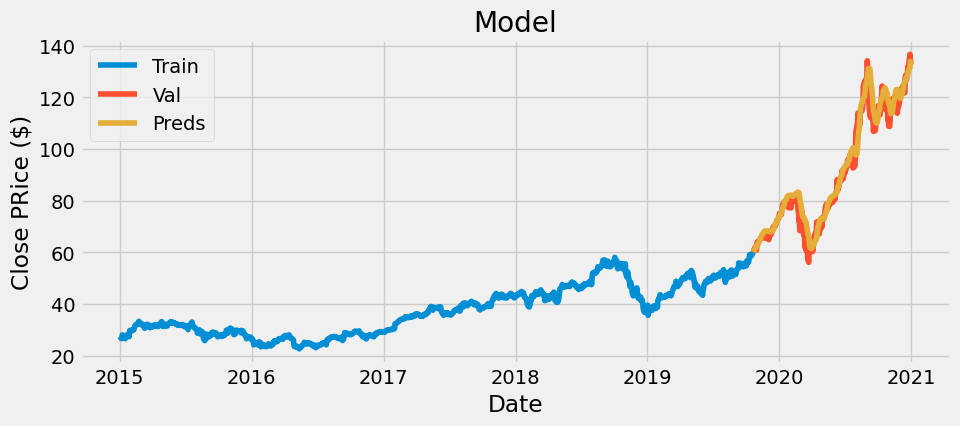

In [29]:
plt.figure(figsize=(10,4))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close PRice ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Preds'])
plt.show()

In [30]:
valid

,Close,Predictions
Date,,
2019-10-22,59.990002,60.132725
2019-10-23,60.794998,60.493156
2019-10-24,60.895000,60.852814
2019-10-25,61.645000,61.210930
2019-10-28,62.262501,61.582058
...,...,...
2020-12-24,131.970001,130.466370
2020-12-28,136.690002,131.361740
2020-12-29,134.869995,132.476654


# Predict closing price for Oct 20, 2022

In [31]:
#df=  web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2019-12-26')
df = yf.download(tickers_list,threads= False,start=datetime.datetime(2021,1,2),
                                end=datetime.datetime(2022,10,20))

[*********************100%***********************]  1 of 1 completed


In [32]:
new_df = df[['Close']]

In [33]:
# get last 60 days
last_60_days = new_df[-60:].values

#scaling
last_60_days_scaled = sc.transform(last_60_days)

c:\Users\Mete\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
xtest = []
#append past 60 days
xtest.append(last_60_days_scaled)
xtest = np.array(xtest)

In [35]:
xtest.shape

(1, 60, 1)

In [36]:
predicted_test = regressor_model.predict(xtest)
predicted_test = sc.inverse_transform(predicted_test)

1/1 [==============================] - 0s 17ms/step


In [37]:
predicted_test

array([[141.18893]], dtype=float32)

In [38]:
df = yf.download(tickers_list,threads= False,start=datetime.datetime(2022,10,20),
                                end=datetime.datetime(2022,10,21))

df['Close']

[*********************100%***********************]  1 of 1 completed


Date
2022-10-20    143.389999
Name: Close, dtype: float64

In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,143.020004,145.889999,142.649994,143.389999,143.152527,64522000


As we can see that actual Close price for 20th Oct, 2022 "147.19" is somewhat closer to predicted "137.28" (Not that close, the model performance can be better with more training data and a better model)